# Predicting locations of up-and-coming global smart/responsive cities
Andrew Yu | DS-SF-38 

![](https://d26dzxoao6i3hh.cloudfront.net/items/431n3O2F2G082s0N081C/Image%202017-10-17%20at%209.05.24%20AM.png?v=bdbdbcf3)

## Business problem
See https://www.kaggle.com/aychando/predicting-employee-kernelover/editnb

## Project Problem and Hypothesis

**Overview:** Experts across industries agree that the landscape and make up of the modern city will change drastically, in large part due to the proliferation of internet/smart devices. As a cohesive whole, these changes will shape our cities to be "smart", "responsive" cities. Given existing data on cities and livability, the aim of this project is to predict the where the next smart, responsive city will be – where is the ripest opportunity across the world?

**Hypothesis:** Previous existing city information (transportation, freight and trade, power, communications, waste management) will allow us to predict whether a city will be a smart, responsive city in the next 5 - 20 years, and provide high quality of living for its inhabitants.

**Methods and models:** This will be a *regression* problem, as I will be predicting some *continuous number*, some kind of score that will allow me to rank cities.

**Potential impact:** Hopefully this is a first step to generating a model that can predict where we should be focusing on, as a global community, to improve the overall welfare of humankind.

**Predictors/covariates:** TBD

**Avalable Data/Datasets:** Will start of using "featured" datasets on Kaggle (which are cleaner than raw data) as a starting point, then look for more robust, in depth raw data:
* https://www.kaggle.com/okfn/world-cities/data
* https://www.kaggle.com/okfn/world-cities
* https://www.kaggle.com/blitzr/movehub-city-rankings
* Others TBD


## Assumptions, Risks, and Caveats

**Assumptions:** Working under the assumption that there is a definition of 'smart, responsive' city, that we can predict.

**Risks:** There is a danger of generalizing, under fitting the model, with sparse features. 
* Will be important to focus a lot of resources into feature engineering
* Cost of the model being wrong? TBD
* Benefit of the model being right? TBD

**Caveats:** TBD

**Outcomes:** TBD


## Domain knowledge
I will largely be using my domain knowledge from the following ETHx Zurich courses I took on edX

- [ETHx:](https://courses.edx.org/courses/course-v1:ETHx+FC-01x+2016_T2/course/)[ ](https://courses.edx.org/courses/course-v1:ETHx+FC-01x+2016_T2/course/)[FC-01x](https://courses.edx.org/courses/course-v1:ETHx+FC-01x+2016_T2/course/)[ ](https://courses.edx.org/courses/course-v1:ETHx+FC-01x+2016_T2/course/)[Future Cities](https://courses.edx.org/courses/course-v1:ETHx+FC-01x+2016_T2/course/)
- [ETHx: FC-02x Livable Future Cities](https://courses.edx.org/courses/course-v1:ETHx+FC-02x+T1_2016/course/) 
- [ETHx: FC-03x](https://courses.edx.org/courses/course-v1:ETHx+ETHx-FC-03x+3T2016/course/)[ ](https://courses.edx.org/courses/course-v1:ETHx+ETHx-FC-03x+3T2016/course/)[Smart Cities](https://courses.edx.org/courses/course-v1:ETHx+ETHx-FC-03x+3T2016/course/)
- [ETHx: FC-04x Responsive Cities](https://courses.edx.org/courses/course-v1:ETHx+FC-04x+3T2017/course/)

Existing research efforts:
* There's a fair amount of existing research on this, will list here: TBD

## Goals and Success Critieria
TBD, get an accurate prediction of smart cities
* Expectations – expected output
* Complexity
* Success criteria for the project
* Next steps if project is "a bust"



![](http://78.media.tumblr.com/6bf97989db5316cb30944385ddb859a4/tumblr_mkaaqyRWAV1s102meo1_500.gif)

### Import Libraries

In [37]:
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


# For modeling
import statsmodels.api as sm
import statsmodels.formula.api as smf

import scipy.stats as stats


/Users/andrewyu/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Graph pipelining for cost of living

In [2]:
plt.figure(figsize=(25,10))

sns.set(style="whitegrid", palette="muted")

df_cost_living = pd.read_csv('datasets/movehubcostofliving.csv')


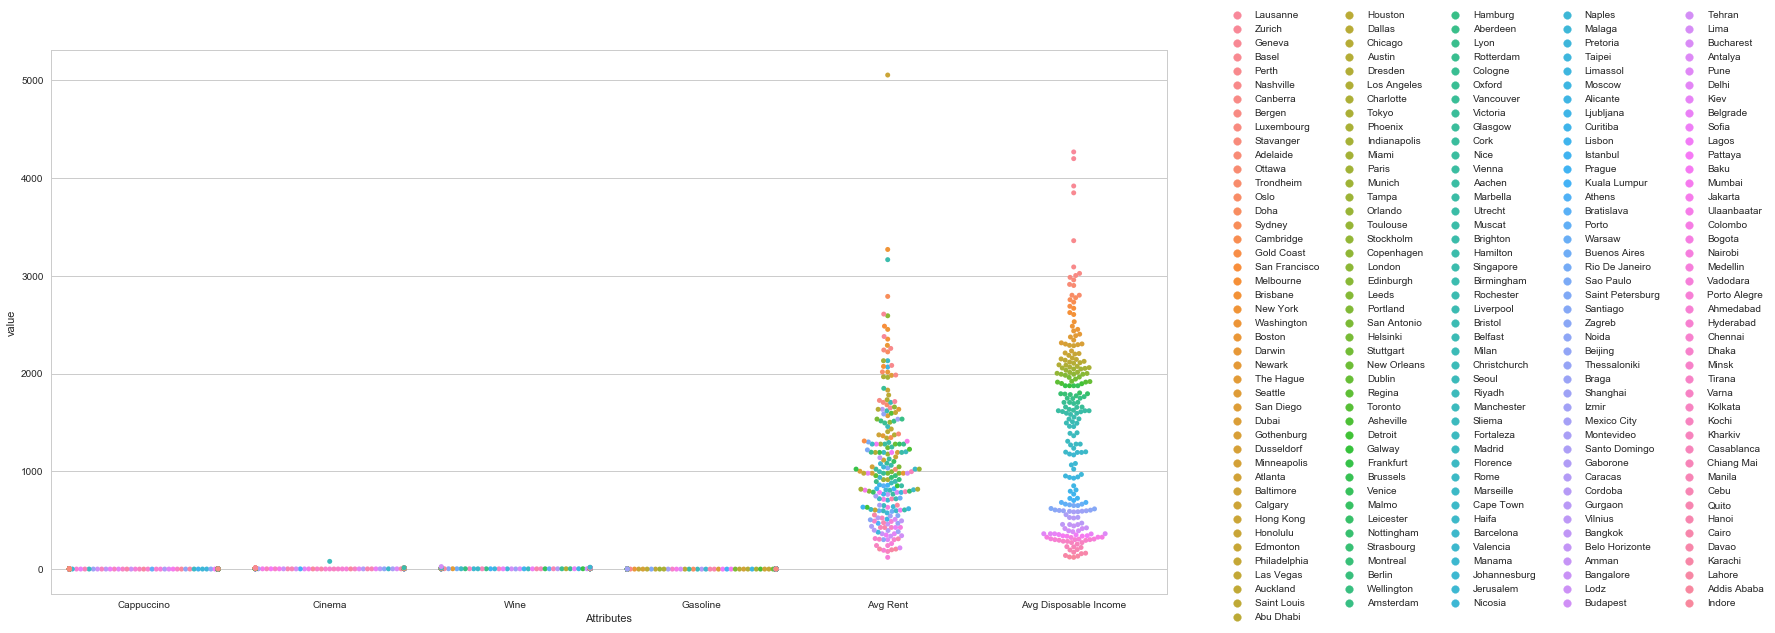

In [3]:
cost = pd.melt(df_cost_living, "City", var_name="Attributes")

swarm_plot = sns.swarmplot(x="Attributes", y="value", hue="City", data=cost)
box = swarm_plot.get_position()
swarm_plot.set_position([box.x0 - 0.09, box.y0, box.width * 0.8, box.height])
plt.legend(bbox_to_anchor=(1.05, 1.08), loc=2, borderaxespad=0., ncol=5)

plt.show()

In [4]:
df_cost_living

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
0,Lausanne,3.15,12.59,8.40,1.32,1714.00,4266.11
1,Zurich,3.28,12.59,8.40,1.31,2378.61,4197.55
2,Geneva,2.80,12.94,10.49,1.28,2607.95,3917.72
3,Basel,3.50,11.89,7.35,1.25,1649.29,3847.76
4,Perth,2.87,11.43,10.08,0.97,2083.14,3358.55
...,...,...,...,...,...,...,...
211,Davao,0.79,1.90,3.17,0.84,554.18,158.34
212,Karachi,1.00,3.27,5.11,0.67,197.78,139.60
213,Lahore,1.23,3.27,6.54,0.66,206.08,132.95
214,Addis Ababa,0.46,2.29,4.18,0.72,653.77,124.22


In [16]:
# Rename column names to not have spaces
df_cost_living.columns = ['City', 'Coffee', 'Cinema', 'Wine', 'Gas', 'AvgRent', 'AvgDispIncome']

In [17]:
df_cost_living[['City','AvgRent']]

,City,AvgRent
0,Lausanne,1714.00
1,Zurich,2378.61
2,Geneva,2607.95
3,Basel,1649.29
4,Perth,2083.14
...,...,...
211,Davao,554.18
212,Karachi,197.78
213,Lahore,206.08
214,Addis Ababa,653.77


In [22]:
# Sort by highest rent

# df_cost_living[df_cost_living.AvgRent >= 1000].sort(['Av'])
df_cost_living.sort_values(['AvgRent'], ascending=False)

,City,Coffee,Cinema,Wine,Gas,AvgRent,AvgDispIncome
36,Hong Kong,2.78,5.89,10.10,1.52,5052.31,2210.39
21,New York,2.58,8.50,9.81,0.69,3268.84,2530.09
105,Singapore,2.64,5.27,15.82,1.11,3164.42,1582.21
15,Sydney,2.35,12.10,10.75,1.00,2788.71,2755.12
2,Geneva,2.80,12.94,10.49,1.28,2607.95,3917.72
...,...,...,...,...,...,...,...
215,Indore,0.91,2.23,6.03,0.84,205.15,120.68
212,Karachi,1.00,3.27,5.11,0.67,197.78,139.60
194,Ahmedabad,0.72,2.11,4.22,0.85,193.08,301.69
202,Kochi,0.60,1.81,3.62,0.84,181.02,271.52


### Graph pipelining for quality of living

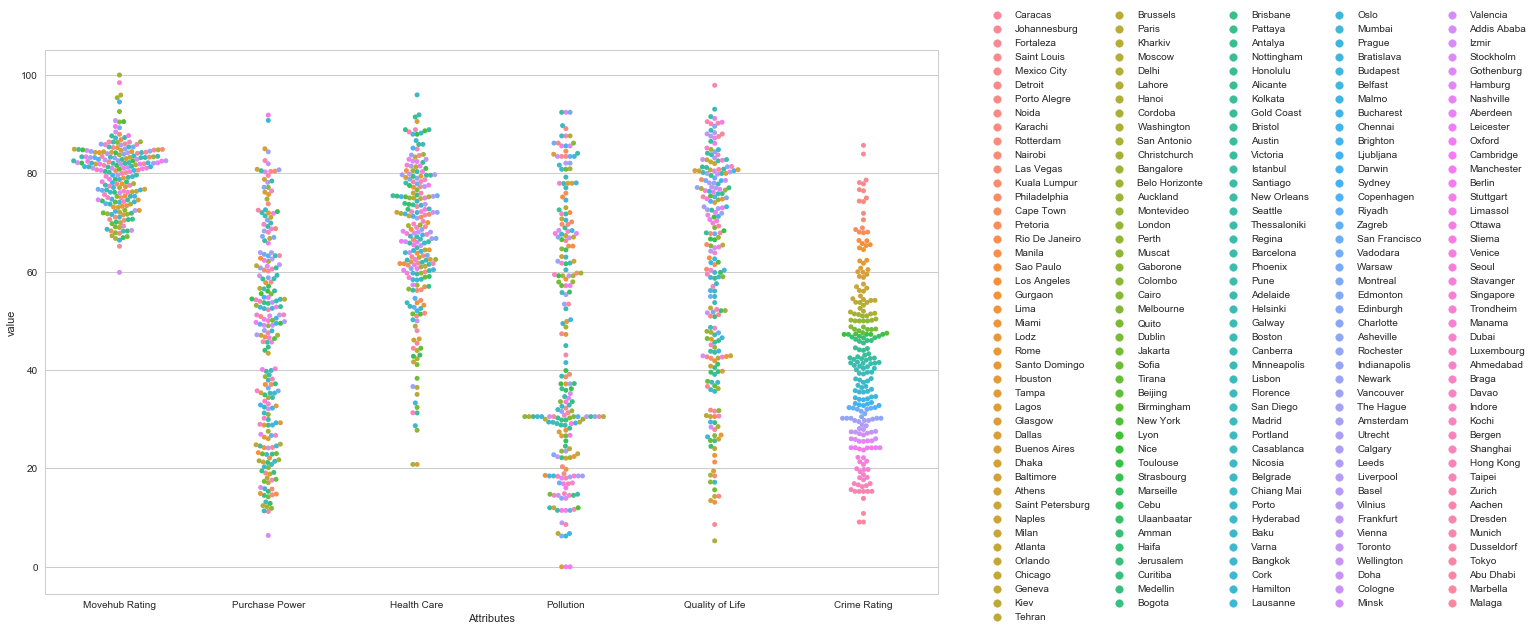

In [7]:
plt.figure(figsize=(20,10))

df_quality_living = pd.read_csv('datasets/movehubqualityoflife.csv')

cost = pd.melt(df_quality_living, "City", var_name="Attributes")

swarm_plot = sns.swarmplot(x="Attributes", y="value", hue="City", data=cost)
box = swarm_plot.get_position()
swarm_plot.set_position([box.x0 - 0.09, box.y0, box.width * 0.8, box.height])
plt.legend(bbox_to_anchor=(1.05, 1.08), loc=2, borderaxespad=0., ncol=5)

plt.show()

In [23]:
df_quality_living.columns = ['City', 'MovehubRating', 'PurchasePower', 'HealthCare', 'Pollution', 'QualityLife', 'CrimeRating']

In [24]:
df_quality_living

,City,MovehubRating,PurchasePower,HealthCare,Pollution,QualityLife,CrimeRating
0,Caracas,65.18,11.25,44.44,83.45,8.61,85.70
1,Johannesburg,84.08,53.99,59.98,47.39,51.26,83.93
2,Fortaleza,80.17,52.28,45.46,66.32,36.68,78.65
3,Saint Louis,85.25,80.40,77.29,31.33,87.51,78.13
4,Mexico City,75.07,24.28,61.76,18.95,27.91,77.86
...,...,...,...,...,...,...,...
211,Dusseldorf,83.45,72.52,75.98,8.61,88.02,15.34
212,Tokyo,80.00,47.57,71.53,30.54,69.29,13.91
213,Abu Dhabi,86.40,68.03,48.02,53.42,80.80,10.86
214,Marbella,81.96,60.14,83.64,32.27,75.24,9.11


### What does the movehub rating mean?
Can I use that to initially create a predictive model for smart cities? From movehub:

```Our data comes from a number of different sources and is always improving. We combine data from www.numbeo.com, data from the CIA World Factbook, Census data from several governments, data from the WHO and our own vast database of real international moves to come up with cost of living figures, crime rates, quality of life, pollution, purchasing power and our overall MoveHub rating (a balance of all of the scores)```



In [28]:
# Try out some correlation
df_quality_living[ ['City', 'MovehubRating', 'PurchasePower', 'HealthCare', 'Pollution', 'QualityLife', 'CrimeRating']].corr()

,MovehubRating,PurchasePower,HealthCare,Pollution,QualityLife,CrimeRating
MovehubRating,1.000000,0.829614,0.366797,-0.271697,0.742073,-0.185205
PurchasePower,0.829614,1.000000,0.322705,-0.214931,0.844957,-0.185861
HealthCare,0.366797,0.322705,1.000000,-0.161485,0.487651,-0.240162
Pollution,-0.271697,-0.214931,-0.161485,1.000000,-0.334963,0.175560
QualityLife,0.742073,0.844957,0.487651,-0.334963,1.000000,-0.427064
CrimeRating,-0.185205,-0.185861,-0.240162,0.175560,-0.427064,1.000000


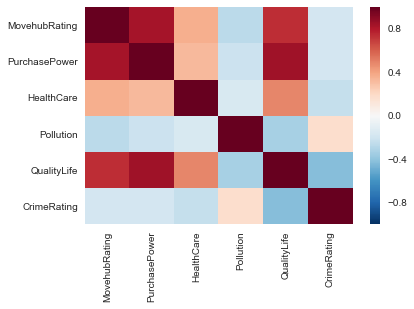

In [36]:
# Correlation Matrix
corr = df_quality_living.corr()
corr = (corr)
sns.heatmap(corr,
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values)


### PurchasePower and QualityLife
Are most highly correlated with the Movehub rating, which makes sense.. but its like pollution and crime rating don't even matter. 

So, maybe safe to say **QualityLife, PurchasePower** are metrics for good smart city, or something

### Linear Regression: PurchasePower
MovehubRating + PurchasePower

In [39]:
model = smf.ols(formula = 'MovehubRating ~ PurchasePower', data=df_quality_living).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MovehubRating   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     472.5
Date:                Fri, 20 Oct 2017   Prob (F-statistic):           4.49e-56
Time:                        17:42:00   Log-Likelihood:                -584.45
No. Observations:                 216   AIC:                             1173.
Df Residuals:                     214   BIC:                             1180.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        67.5170      0.612    110.368      0.000      66.311      68.723
PurchasePower     0.2616      0.012     21.736      0.000       0.238       0.285
==============================================================================
Omnibus:                       81.606   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              527.772
Skew:                           1.293   Prob(JB):                    2.49e-115
Kurtosis:                      10.208   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

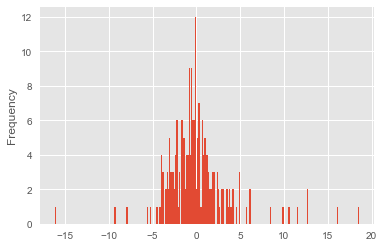

In [40]:
model.resid.plot(kind='hist', bins=250)

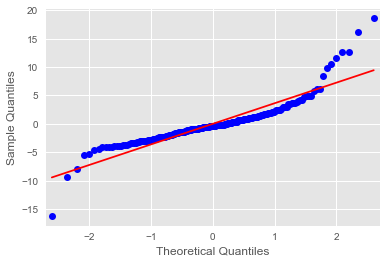

In [41]:
sm.qqplot(model.resid, line='s')
pass

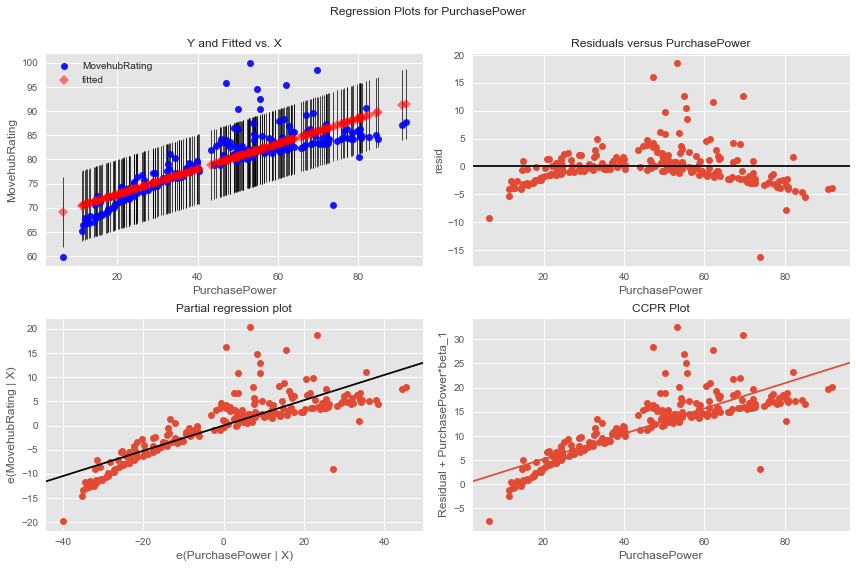

In [44]:
sm.graphics.plot_regress_exog(model, 'PurchasePower', fig = plt.figure(figsize = (12, 8)))

pass

### Linear Regression: QualityLife
MovehubRating + QualityLife

In [45]:
model = smf.ols(formula = 'MovehubRating ~ QualityLife', data=df_quality_living).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MovehubRating   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     262.3
Date:                Fri, 20 Oct 2017   Prob (F-statistic):           4.88e-39
Time:                        17:48:10   Log-Likelihood:                -623.93
No. Observations:                 216   AIC:                             1252.
Df Residuals:                     214   BIC:                             1259.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      66.5325      0.864     76.975      0.000      64.829      68.236
QualityLife     0.2191      0.014     16.195      0.000       0.192       0.246
==============================================================================
Omnibus:                       68.385   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.431
Skew:                           1.238   Prob(JB):                     2.07e-56
Kurtosis:                       7.729   Cond. No.                         186.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

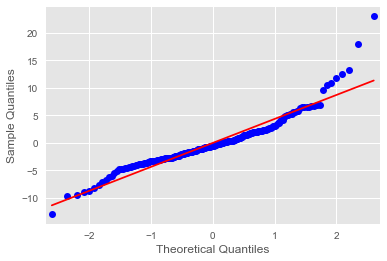

In [46]:
sm.qqplot(model.resid, line='s')
pass